# Chapter1. 데이터 기본정보 및 시각화 방법

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

## 기초통계 및 데이터확인

In [2]:
df = pd.read_csv('./kospi_data.csv')
df.describe()

,Close,Open,High,Low,Volume,Change
count,11024.000000,11024.000000,11024.000000,11024.000000,1.102400e+04,11024.000000
mean,1121.077967,1121.552291,1127.448217,1114.365044,2.556932e+08,0.000379
std,772.891667,773.393378,777.129136,768.310046,2.938432e+08,0.014550
min,105.990000,105.990000,105.990000,105.990000,1.660000e+05,-0.120200
25%,586.562500,586.482500,589.730000,582.837500,1.208750e+07,-0.006300
50%,878.105000,878.015000,882.360000,873.430000,2.264900e+08,0.000300
75%,1891.347500,1892.090000,1902.320000,1880.635000,4.028000e+08,0.007200
max,3305.210000,3305.460000,3316.080000,3295.440000,3.460000e+09,0.119500


In [3]:
df = pd.read_csv('./kospi_data.csv')
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

label = [] # for classfication
for test in list(df['Change']):
    if test >= 0:
        label.append(1)
    else:
        label.append(0)
df['label'] = pd.DataFrame(label)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024 entries, 0 to 11023
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    11024 non-null  datetime64[ns]
 1   Close   11024 non-null  float64       
 2   Open    11024 non-null  float64       
 3   High    11024 non-null  float64       
 4   Low     11024 non-null  float64       
 5   Volume  11024 non-null  float64       
 6   Change  11024 non-null  float64       
 7   label   11024 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 689.1 KB
None


## 이동평균선

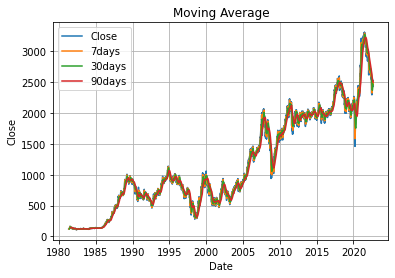

In [4]:
plt.plot(df['Date'],df['Close'].rolling(window=1).mean())
plt.plot(df['Date'],df['Close'].rolling(window=7).mean())
plt.plot(df['Date'],df['Close'].rolling(window=30).mean())
plt.plot(df['Date'],df['Close'].rolling(window=90).mean())

plt.grid()
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Moving Average')
plt.legend(['Close','7days','30days','90days'])

In [5]:
save_ = pd.DataFrame()
save_['Date'] = df['Date']
save_['Close'] = df['Close'].rolling(window=7).mean()
save_.to_json('./week.json')

## Close with Volume

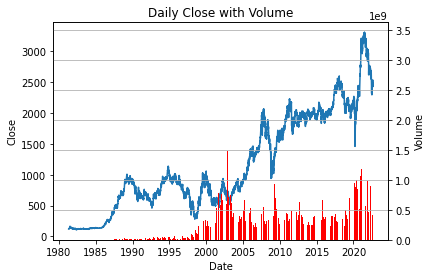

In [6]:
fig, ax1 = plt.subplots()
ax1.plot(df['Date'], df['Close'])
ax1.set_xlabel('Date')
ax1.set_ylabel('Close')

ax2 = ax1.twinx()
ax2.set_ylabel('Volume')
ax2.bar(df['Date'], df['Volume'],color='red')

plt.title('Daily Close with Volume')
plt.grid()

## Monthly boxplot

- 일,주,월,연 단위 옵션가능

Text(0, 0.5, 'Close')

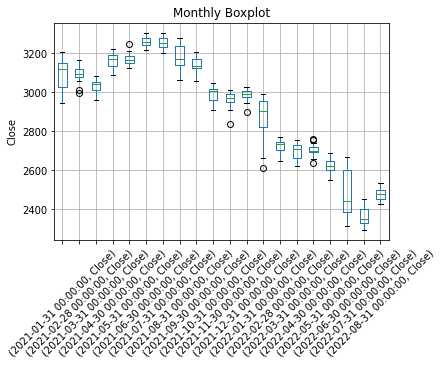

In [7]:
df[df['Date'] > '2021-01-01'].loc[:,['Date','Close']].groupby(
    [pd.Grouper(key='Date', freq='1M')]).boxplot(
        subplots=False,rot=45)

plt.title('Monthly Boxplot')
plt.ylabel('Close')

## Spline smoothing

In [8]:
df = pd.read_csv('./kospi_data.csv')
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df

,Date,Close,Open,High,Low,Volume,Change
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116
...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099


## Spline smoothing

In [9]:
def spline(feature):
    y = np.array(df[df['Date'] >= '2022-08-01'][feature])
    x = np.linspace(1., 22., 22)
    sp = interpolate.interp1d(x,y,kind='cubic')

    # sp = csaps.csaps(x, y, smooth=0.8)
    xs = np.linspace(x[0], x[-1], 120)
    ys = sp(xs)
    return xs,ys

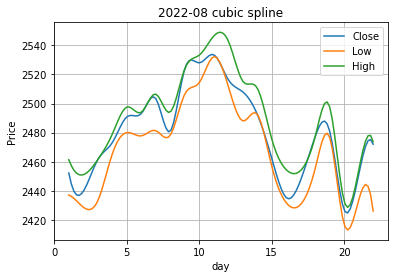

In [10]:
xc,yc = spline('Close')
xl,yl = spline('Low')
xh,yh = spline('High')

plt.plot(xc,yc)
plt.plot(xl,yl)
plt.plot(xh,yh)

plt.legend(['Close','Low','High'])
plt.title('2022-08 cubic spline')
plt.ylabel('Price')
plt.xlabel('day')
plt.grid()

# Chapter2. Classification Invest Model

- Method bundle
- Grid search
- Feature selection (skip) : combination rule

- 전일 상승/하락을 이용한 투자방법 검증

In [11]:
df_split = [-1]
df_split.extend(list(df.iloc[:-1,-1]))
df['df_split'] = df_split
df

,Date,Close,Open,High,Low,Volume,Change,df_split
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,-1.0000
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,0.0098
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,-0.0008
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,-0.0235
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,0.0008
...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,0.0050
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,0.0122
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,0.0015
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,-0.0218


- 전일 데이터를 이용하므로 label 을 한칸밀어준 df_split 컬럼을 생성해준다.

In [46]:
df = pd.read_csv('./kospi_data.csv')

label = []
for test in list(df['Change']):
    if test >= 0:
        label.append(1)
    else:
        label.append(0)
df['label'] = pd.DataFrame(label)
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df_split = [-1]
df_split.extend(list(df.iloc[:-1,-1]))
df['df_split'] = df_split

df = df[df['Date'] >= '2000-01-01']
df = df.reset_index().drop('index',axis=1)
df

,Date,Close,Open,High,Low,Volume,Change,label,df_split
0,2000-01-04,1059.04,1028.33,1066.18,1016.59,195900000.0,0.0301,1,1
1,2000-01-05,986.31,1006.87,1026.52,984.05,257700000.0,-0.0687,0,1
2,2000-01-06,960.79,1013.95,1014.90,953.50,203520000.0,-0.0259,0,0
3,2000-01-07,948.65,949.17,970.16,930.84,215660000.0,-0.0126,0,0
4,2000-01-10,987.24,979.67,994.94,965.02,240180000.0,0.0407,1,0
...,...,...,...,...,...,...,...,...,...
5592,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,1,1
5593,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,1,1
5594,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,0,1
5595,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,1,0


In [47]:
df = df[df['df_split'] == 1]

In [48]:
(df['Close'] - df['Open']).sum()

-1687.499999999993

In [49]:
df['Open'].mean() # 케이스 평균 구매가

1687.5922933333334

Text(0.5, 0, 'Case')

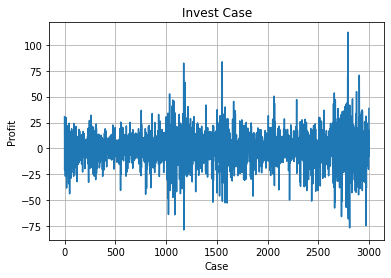

In [50]:
plt.plot(range(len(df)),df['Close'] - df['Open'])
plt.grid()
plt.title('Invest Case')
plt.ylabel('Profit')
plt.xlabel('Case')

In [4]:
heat = pd.DataFrame([[i,j] for i,j in zip(list(df['label'])[1:],list(df['df_split'])[1:])])
heat.columns = ['label','split_label']
arr = np.array([[0,0],[0,0]])

tar = pd.DataFrame(heat.value_counts()).reset_index()
for i in range(2):
    tp = tar[tar['label'] == i]
    for j in range(2):
        arr[i][j] = tp[tp['split_label'] == j][0]

tar

,label,split_label,0
0,1,1,1623
1,0,1,1376
2,1,0,1376
3,0,0,1221


In [6]:
tar.to_csv('./tar.csv')

<AxesSubplot:>

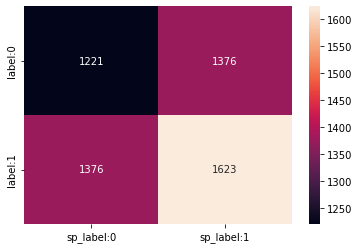

In [5]:
import seaborn as sns 
sns.heatmap(arr,xticklabels=['sp_label:0','sp_label:1'],
            yticklabels=['label:0','label:1'],annot=True,fmt='d')


- 2000년 이후데이터 사용.
- 전날 상승한경우, 현재 상승하는 경우가 가장많다.
 
 -> 전날 상승장인 경우 투자하는 방법은 정상적인 경험적 투자방법 : 위 경우, 투자 케이스 검증은 스킵
 
 
- sp_label 이 1인경우를 투자케이스로 정한다면 승률은 54.1%

수행내용
- sp_label 을 예측 레이블로 바꾼다.
- 분류를 이용하여 투자케이스 검증
- grid search 이용

In [8]:
!pip install xgboost

  Using cached xgboost-1.6.2-py3-none-win_amd64.whl (125.4 MB)


In [1]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression # 앙상블 조합용
from sklearn.neighbors import KNeighborsClassifier # 앙상블 조합용
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
# from itertools import combinations
import warnings

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('./kospi_data.csv')

label = []
for test in list(df['Change']):
    if test >= 0:
        label.append(1)
    else:
        label.append(0)
df['label'] = pd.DataFrame(label)
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df_split = [-1]
df_split.extend(list(df.iloc[:-1,-1]))
df['df_split'] = df_split

df = df[df['Date'] >= '2000-01-01']
df = df.reset_index().drop('index',axis=1)
df

,Date,Close,Open,High,Low,Volume,Change,label,df_split
0,2000-01-04,1059.04,1028.33,1066.18,1016.59,195900000.0,0.0301,1,1
1,2000-01-05,986.31,1006.87,1026.52,984.05,257700000.0,-0.0687,0,1
2,2000-01-06,960.79,1013.95,1014.90,953.50,203520000.0,-0.0259,0,0
3,2000-01-07,948.65,949.17,970.16,930.84,215660000.0,-0.0126,0,0
4,2000-01-10,987.24,979.67,994.94,965.02,240180000.0,0.0407,1,0
...,...,...,...,...,...,...,...,...,...
5592,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,1,1
5593,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,1,1
5594,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,0,1
5595,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,1,0


In [11]:
df.loc[:len(df)-1001,['Volume','Open','High','Low']] # train

,Volume,Open,High,Low
0,195900000.0,1028.33,1066.18,1016.59
1,257700000.0,1006.87,1026.52,984.05
2,203520000.0,1013.95,1014.90,953.50
3,215660000.0,949.17,970.16,930.84
4,240180000.0,979.67,994.94,965.02
...,...,...,...,...
4592,270490000.0,2278.33,2288.93,2272.94
4593,244550000.0,2288.51,2300.38,2283.26
4594,230340000.0,2290.85,2301.27,2279.55
4595,299690000.0,2305.73,2308.60,2298.41


In [201]:
class Prediction():
    def __init__(self): # input : classifier,features
        df = pd.read_csv('./kospi_data.csv')

        label = []
        for test in list(df['Change']):
            if test >= 0:
                label.append(1)
            else:
                label.append(0)
        df['label'] = pd.DataFrame(label)
        df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
        df_split = [-1]
        df_split.extend(list(df.iloc[:-1,-1]))
        df['df_split'] = df_split
        
        df = df[df['Date'] >= '2000-01-01']
        df = df.reset_index().drop('index',axis=1)

        self.df = df.loc[:len(df)-1000,['Volume','Open','High','Low']]
        self.label = pd.DataFrame(df.loc[:len(df)-1000,'df_split'])
        self.pred_target = pd.DataFrame(df.loc[len(df)-1000:,['Volume','Open','High','Low']])

    # bundle(dtc(),)
    def bundle(self, classifier, features, test_size):

        total_tbl_train = self.df
        total_tbl_label = self.label

        X_train, X_test, y_train, y_test = train_test_split(total_tbl_train
                                                            , total_tbl_label
                                                            , test_size=test_size,
                                                            random_state=10)

        #DecisionTree = DecisionTreeClassifier(random_state=10)
        #Logistic = LogisticRegression(random_state=10)
        #KNeighbors = KNeighborsClassifier(n_neighbors=4)
        #Voting = VotingClassifier(estimators=[('LR', Logistic), ('KN', KNeighbors)], voting='hard')
        #RandomForest = RandomForestClassifier(random_state=10)
        #GradientBoosting = GradientBoostingClassifier(random_state=10)
        #XGB = xgb.XGBClassifier(random_state=10)
        #choice = {'DecisionTree': self.dtc(), 'Logistic': Logistic, 'KNeighbors': KNeighbors,
        #          'Voting': Voting, 'RandomForest': RandomForest, 'GradientBoosting': GradientBoosting,
        #          'XGB': XGB}

        clf = classifier
        clf.fit(X_train, y_train)  # classifier
        acc_pred = clf.predict(X_test)
        acc = np.round(accuracy_score(y_test, acc_pred), 4) # 

        pred = clf.predict(np.array(self.pred_target[features])) # .reshape(1,-1)

        return round(acc * 100, 2),pred

    def dtc(self,max_depth,min_samples_leaf,min_samples_split):

        return DecisionTreeClassifier(random_state=10,
                                      max_depth=max_depth,
                                      min_samples_leaf=min_samples_leaf,
                                      min_samples_split=min_samples_split)

    def logi(self,l1_ratio):
        return LogisticRegression(random_state=10,penalty='elasticnet',l1_ratio=l1_ratio,solver='saga')

    def kNN(self,n_neighbors):
        return KNeighborsClassifier(n_neighbors=n_neighbors)

    def Vote(self):
        return VotingClassifier(estimators=[('LR', self.logi(0.5)), ('KN', self.kNN(4))])

    def RanF(self,max_depth,min_samples_leaf,min_samples_split,max_samples):
        return RandomForestClassifier(random_state=10,
                                      max_depth=max_depth,
                                      min_samples_leaf=min_samples_leaf,
                                      min_samples_split=min_samples_split,
                                      bootstrap=True,
                                      max_samples=max_samples)

    def GradB(self,max_depth,min_samples_leaf,min_samples_split,learning_rate):
        return GradientBoostingClassifier(random_state=10,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          min_samples_split=min_samples_split,
                                          learning_rate=learning_rate)

    def xgB(self):
        return xgb.XGBClassifier(random_state=10)


In [202]:
class best(Prediction):
    def __init__(self):
        self.features = ['Volume','Open','High','Low']
        self.result = []
        print('start')
        self.result.append(self.dtc_best())
        print('dtc fin')
        self.result.append(self.logi_best())
        print('logi fin')
        self.result.append(self.knn_best())
        print('knn fin')
        self.result.append(self.vote_best())
        print('vote fin')
        self.result.append(self.ranf_best())
        print('ranf fin')
        self.result.append(self.grad_best())
        print('grad fin')
        self.result.append(self.xgb_best())
        print('xgb fin')


    def dtc_best(self):
        prediction_method = Prediction()
        train_test_rate = 0.2
        tp = []
        idx = []
        for i in range(1,10):
            for j in range(1,10):
                for k in range(2,10):
                    for l in range(1,len(self.features)+1):
                        #for feature in list(combinations(features,l)):
                        np.random.seed(10)
                        #print(np.random.rand(5))
                        tp.append(prediction_method.bundle(prediction_method.dtc(i,j,k), self.features, train_test_rate)[0])
                        idx.append([i,j,k,self.features])
                        #print([i,j,k,feature])
        return 'dtc',idx[tp.index(max(tp))],max(tp)

    def logi_best(self):
        prediction_method = Prediction()
        train_test_rate = 0.2
        tp = []
        idx = []
        for i in range(0,101,5):
            for l in range(1,len(self.features)+1):
                #for feature in list(combinations(features,l)):
                np.random.seed(10)
                #print(np.random.rand(5))
                tp.append(prediction_method.bundle(prediction_method.logi(i/100), self.features, train_test_rate)[0])
                idx.append([i,self.features])
                #print([i/100,feature])

        return 'logi',idx[tp.index(max(tp))],max(tp)

    def knn_best(self):
        prediction_method = Prediction()
        train_test_rate = 0.2
        tp = []
        idx = []
        for i in range(1,11):
            for l in range(1,len(self.features)+1):
                #for feature in list(combinations(features,l)):
                np.random.seed(10)
                #print(np.random.rand(5))
                tp.append(prediction_method.bundle(prediction_method.kNN(i), self.features, train_test_rate)[0])
                idx.append([i,self.features])
                #print([i,feature])

        return 'knn',idx[tp.index(max(tp))],max(tp)

    def vote_best(self):
        prediction_method = Prediction()
        train_test_rate = 0.2

        tp = []
        idx = []

        for l in range(1,len(self.features)+1):
            #for feature in list(combinations(features,l)):
            np.random.seed(10)
            #print(np.random.rand(5))
            tp.append(prediction_method.bundle(prediction_method.Vote(), self.features, train_test_rate)[0])
            idx.append([self.features])
            #print([feature])

        return 'vote',idx[tp.index(max(tp))],max(tp)

    def ranf_best(self):
        prediction_method = Prediction()
        train_test_rate = 0.2
        tp = []
        idx = []
        for i in range(1,10):
            for j in range(1,10):
                for k in range(2,10):
                    for ms in range(10,101,10):
                        #for l in range(1,len(features)+1):
                        #    for feature in list(combinations(features,l)):
                        np.random.seed(10)
                        #print(np.random.rand(5))
                        tp.append(prediction_method.bundle(prediction_method.RanF(i,j,k,ms), self.features, train_test_rate)[0])
                        idx.append([i,j,k,ms,self.features])
                        #print([i,j,k,ms,features])
            print(f'{i}/10')

        return 'ranf',idx[tp.index(max(tp))],max(tp)

    def grad_best(self):
        prediction_method = Prediction()
        train_test_rate = 0.2
        tp = []
        idx = []
        for i in range(1,10):
            for j in range(1,10):
                for k in range(2,10):
                    for ms in range(1,5):
                        #for l in range(1,len(features)+1):
                        #    for feature in list(combinations(features,l)):
                        np.random.seed(10)
                        #print(np.random.rand(5))
                        tp.append(prediction_method.bundle(prediction_method.GradB(i,j,k,ms/10), self.features, train_test_rate)[0])
                        idx.append([i,j,k,ms/10,self.features])
                        #print([i,j,k,ms/10,features])
            print(f'{i}/10')

        return 'grad',idx[tp.index(max(tp))],max(tp)

    def xgb_best(self):
        prediction_method = Prediction()
        train_test_rate = 0.2

        tp = []
        idx = []

        for l in range(1,len(self.features)+1):
            #for feature in list(combinations(features,l)):
            np.random.seed(10)
            #print(np.random.rand(5))
            tp.append(prediction_method.bundle(prediction_method.xgB(), self.features, train_test_rate)[0])
            idx.append([self.features])
            #print([feature])

        return 'xgb',idx[tp.index(max(tp))],max(tp)

In [199]:
bst = best() # f1

start
dtc fin
logi fin
knn fin
vote fin
1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
ranf fin
1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
grad fin
xgb fin


In [200]:
summary = pd.DataFrame(bst.result)
summary.columns = ['Method','Parms','acc']
summary

,Method,Parms,acc
0,dtc,"[7, 1, 4, [Volume, Open, High, Low]]",55.33
1,logi,"[0, [Volume, Open, High, Low]]",53.26
2,knn,"[1, [Volume, Open, High, Low]]",48.91
3,vote,"[[Volume, Open, High, Low]]",46.96
4,ranf,"[5, 2, 7, 60, [Volume, Open, High, Low]]",57.50
5,grad,"[9, 5, 2, 0.4, [Volume, Open, High, Low]]",62.17
6,xgb,"[[Volume, Open, High, Low]]",59.13


In [179]:
summary = pd.DataFrame(bst.result)
summary.columns = ['Method','Parms','precision']
summary

,Method,Parms,precision
0,dtc,"[7, 1, 8, [Volume, Open, High, Low]]",55.06
1,logi,"[0, [Volume, Open, High, Low]]",53.26
2,knn,"[1, [Volume, Open, High, Low]]",52.05
3,vote,"[[Volume, Open, High, Low]]",50.30
4,ranf,"[7, 2, 8, 100, [Volume, Open, High, Low]]",56.71
5,grad,"[9, 5, 2, 0.4, [Volume, Open, High, Low]]",63.55
6,xgb,"[[Volume, Open, High, Low]]",60.52


In [204]:
pr = Prediction()
df = pd.read_csv('./kospi_data.csv')

label = []
for test in list(df['Change']):
    if test >= 0:
        label.append(1)
    else:
        label.append(0)
df['label'] = pd.DataFrame(label)
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df_split = [-1]
df_split.extend(list(df.iloc[:-1,-1]))
df['df_split'] = df_split

df = df[df['Date'] >= '2000-01-01']
df = df.reset_index().drop('index',axis=1)
heat = pd.DataFrame([[i,j] for i,j in zip(list(df['label'])[-1000:],
                                          list(pr.bundle(pr.GradB(9,4,9,0.1),['Volume','Open','High','Low'],0.2))[1])])
heat.columns = ['label','split_label']
arr = np.array([[0,0],[0,0]])

tar = pd.DataFrame(heat.value_counts()).reset_index()
for i in range(2):
    tp = tar[tar['label'] == i]
    for j in range(2):
        arr[i][j] = tp[tp['split_label'] == j][0]

arr

array([[128, 323],
       [169, 380]])

<AxesSubplot:>

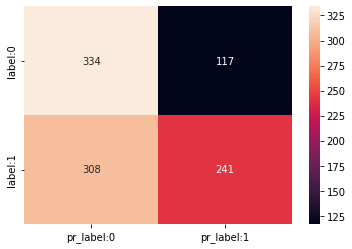

In [9]:
import seaborn as sns
sns.heatmap(arr,xticklabels=['pr_label:0','pr_label:1'],
            yticklabels=['label:0','label:1'],annot=True,fmt='d')

In [216]:
pr = Prediction()
case = pr.bundle(pr.GradB(9,4,9,0.1),['Volume','Open','High','Low'],0.2)[1]
df = pd.read_csv('./kospi_data.csv')
label = []
for test in list(df['Change']):
    if test >= 0:
        label.append(1)
    else:
        label.append(0)
df['label'] = pd.DataFrame(label)
df_split = [-1]
df_split.extend(list(df.iloc[:-1,-1]))
df['df_split'] = df_split
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df = df.loc[len(df)-1000:,:]
df = df.reset_index().drop('index',axis=1)
df['case'] = case
df = df[(df['case'] == 1) & (df['df_split'] == 1)] # & (df['df_split'] == 1)
df

,Date,Close,Open,High,Low,Volume,Change,label,df_split,case
0,2018-08-10,2282.79,2295.21,2295.62,2277.89,286160000.0,-0.0091,0,1,1
7,2018-08-22,2273.33,2273.68,2280.31,2268.91,269270000.0,0.0014,1,1,1
9,2018-08-24,2293.21,2276.16,2295.22,2271.35,347290000.0,0.0046,1,1,1
10,2018-08-27,2299.30,2297.32,2302.87,2289.41,307040000.0,0.0027,1,1,1
11,2018-08-28,2303.12,2312.14,2314.60,2299.45,276890000.0,0.0017,1,1,1
...,...,...,...,...,...,...,...,...,...,...
983,2022-08-08,2493.10,2481.17,2494.00,2477.76,418230000.0,0.0009,1,1,1
985,2022-08-10,2480.88,2493.70,2494.15,2478.21,479470000.0,-0.0090,0,1,1
988,2022-08-16,2533.52,2543.05,2546.35,2532.20,398340000.0,0.0022,1,1,1
995,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,1,1,1


In [217]:
df['Open'].mean() # 케이스 평균 구매가

2584.21782152231

In [218]:
(df['Close'] - df['Open']).sum() # 현재

159.1100000000015

In [209]:
159/2584

0.06153250773993808

Text(0.5, 0, 'Case')

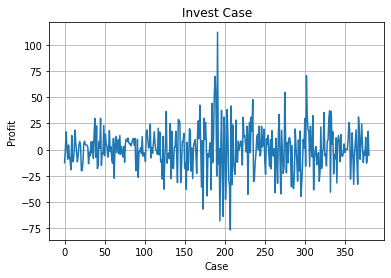

In [219]:
plt.plot(range(len(df)),df['Close'] - df['Open'])
plt.grid()
plt.title('Invest Case')
plt.ylabel('Profit')
plt.xlabel('Case')

In [14]:
bst = best()

start
dtc fin
logi fin
knn fin
vote fin
1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
ranf fin
1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
grad fin
xgb fin


In [15]:
summary = pd.DataFrame(bst.result)
summary.columns = ['Method','Parms','Precision']
summary

,Method,Parms,Precision
0,dtc,"[8, 6, 2, [Volume, Open, High, Low]]",56.73
1,logi,"[0, [Volume, Open, High, Low]]",53.37
2,knn,"[8, [Volume, Open, High, Low]]",57.00
3,vote,"[[Volume, Open, High, Low]]",52.42
4,ranf,"[8, 1, 3, 30, [Volume, Open, High, Low]]",55.80
5,grad,"[9, 4, 9, 0.1, [Volume, Open, High, Low]]",58.38
6,xgb,"[[Volume, Open, High, Low]]",53.57


In [16]:
summary.to_csv('summary.csv')

- example

- dtc : 

        DecisionTreeClassifier(random_state=10,
                      max_depth=max_depth,
                      min_samples_leaf=min_samples_leaf,
                      min_samples_split=min_samples_split)
                      
- Prediction label 이 1인경우 구매를 계획 했으므로 metric을 정밀도로 설정. (가장많은 투자성공 케이스를 얻기위함.)
- 1000개 데이터로 예측 실행.

In [17]:
pr = Prediction()
pr.bundle(pr.GradB(9,4,9,0.1),['Volume','Open','High','Low'],0.2)

(58.38,
 array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
        0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 1, 0, 0, 1, 1, 0

## 모델 적용

In [1]:
1000/5597

0.17866714311238163

In [64]:
heat = pd.DataFrame([[i,j] for i,j in zip(list(df['label'])[-1000:],
                                          list(pr.bundle(pr.GradB(9,4,9,0.1),['Volume','Open','High','Low'],0.2))[1])])
heat.columns = ['label','split_label']
arr = np.array([[0,0],[0,0]])

tar = pd.DataFrame(heat.value_counts()).reset_index()
for i in range(2):
    tp = tar[tar['label'] == i]
    for j in range(2):
        arr[i][j] = tp[tp['split_label'] == j][0]

arr


array([[139, 315],
       [158, 388]])

<AxesSubplot:>

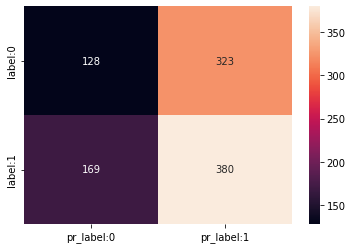

In [22]:
sns.heatmap(arr,xticklabels=['pr_label:0','pr_label:1'],
            yticklabels=['label:0','label:1'],annot=True,fmt='d')

In [23]:
380/(323+380)

0.5405405405405406

- pr_label 이 1인경우 구매한다면 54.1%의 승률을 기록한다. 공교롭게 같은 승률이 나왔다.

## 투자모델 검증

- pr_label 이 1인경우 구매를 한다고 가정한다.
- 장 시작시점에 구매하고, 장 종료시점에 판매한다고 가정한다.

In [130]:
df = pd.read_csv('./kospi_data.csv')
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df = df.loc[len(df)-1000:,:]
df = df.reset_index().drop('index',axis=1)
#df['label'] = case
df # 대상데이터

,Date,Close,Open,High,Low,Volume,Change
0,2018-08-10,2282.79,2295.21,2295.62,2277.89,286160000.0,-0.0091
1,2018-08-13,2248.45,2266.43,2271.82,2238.55,335380000.0,-0.0150
2,2018-08-14,2258.91,2249.86,2262.52,2247.37,255220000.0,0.0047
3,2018-08-16,2240.80,2233.05,2244.08,2218.09,312520000.0,-0.0080
4,2018-08-17,2247.05,2244.61,2250.92,2240.14,238380000.0,0.0028
...,...,...,...,...,...,...,...
995,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122
996,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015
997,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218
998,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099


In [131]:
pr = Prediction()
df['Inv_case'] = pr.bundle(pr.GradB(9,4,9,0.1),['Volume','Open','High','Low'],0.2)[1] # 투자모델
df = df[(df['Inv_case'] == 1)]
df # 투자케이스

,Date,Close,Open,High,Low,Volume,Change,Inv_case
2,2018-08-14,2258.91,2249.86,2262.52,2247.37,255220000.0,0.0047,1
3,2018-08-16,2240.80,2233.05,2244.08,2218.09,312520000.0,-0.0080,1
5,2018-08-20,2247.88,2257.35,2264.42,2245.06,271600000.0,0.0004,1
6,2018-08-21,2270.06,2248.04,2272.86,2244.59,294340000.0,0.0099,1
7,2018-08-22,2273.33,2273.68,2280.31,2268.91,269270000.0,0.0014,1
...,...,...,...,...,...,...,...,...
992,2022-08-22,2462.50,2467.38,2475.77,2457.08,422550000.0,-0.0121,1
995,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,1
997,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,1
998,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,1


In [26]:
df.to_csv('classification_invest.csv')

In [134]:
(df['Close'] - df['Open']).sum()

1545.7100000000028

In [135]:
df['Open'].mean() # 케이스 평균 구매가

2304.755

In [27]:
4588/2572 # 케이스 손실율 

1.7838258164852254

- 손실을 보이므로 투자에 적용하지 않는다.

## 투자 케이스 시각화

Text(0.5, 0, 'Case')

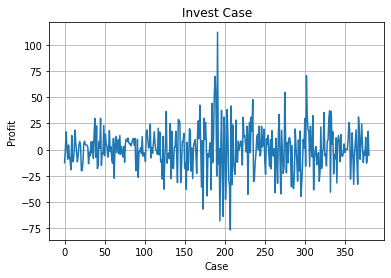

In [211]:
plt.plot(range(len(df)),df['Close'] - df['Open'])
plt.grid()
plt.title('Invest Case')
plt.ylabel('Profit')
plt.xlabel('Case')

# Chapter3. Regression Invest Model

- 2000년 이후데이터 사용
- LinearRegression을 통한 Close 추측 -> pred 컬럼
- 당일 데이터로 다음날 Close의 예측을위해 데이터 스플릿

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('./kospi_data.csv')
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df = df[df['Date'] > '2000-01-01'].reset_index().drop('index',axis=1)
lr = LinearRegression()
# option
# quad = PolynomialFeatures(degree=1) # ,include_bias=False
# input_idx = len(df) - 100

features = ['Volume','Open','High','Low']

X = df.loc[:len(df)-1001,features]
y = df.loc[1:len(df)-1000,'Close']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3677, 4) (920, 4) (3677,) (920,)


In [28]:
from sklearn.metrics import mean_squared_error,r2_score
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
mse = mean_squared_error(pred,y_test)
rmse = np.sqrt(mse)

In [29]:
rmse

18.96481764512902

In [30]:
temp_score_df = df.loc[len(df)-1001:,features]
pred = lr.predict(temp_score_df)
temp_score_df['Close'] = df['Close']
temp_score_df['pred'] = pred

test rmse : 18.9648


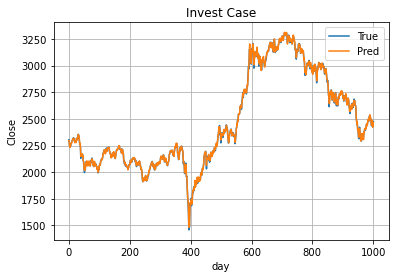

In [31]:
plt.plot(range(len(temp_score_df)),temp_score_df['Close'])
plt.plot(range(len(temp_score_df)),temp_score_df['pred'])
plt.title('Invest Case')
plt.xlabel('day')
plt.ylabel('Close')
plt.grid()
plt.legend(['True','Pred'])
print(f'test rmse : {round(rmse,4)}')
# print(f'r2 : {round(r2_score(pred,y),4)}')

## 투자모델 및 검증

- lstm, gru 등 딥러닝 모델에서도 같은 규칙을 생각할 수 있다.
- 장이 닫혀야 Feature가 생성되므로 내일을 예측하기위해 예측 후,예측정보를 한칸 밀어준다.
- 당일 Open 가격 보다 높게 pred가 형성되는 케이스에 투자한다고 가정한다.
- 장 시작시점에 구매하고, 장 종료시점에 판매한다고 가정한다.

In [32]:
temp_score_df = temp_score_df.reset_index().drop('index',axis=1)
part1 = temp_score_df.loc[1:1000,['Volume','Open','High','Low','Close']].reset_index().drop('index',axis=1)
part2 = temp_score_df.loc[:999,'pred']
Date = df['Date'][-1000:].reset_index().drop('index',axis=1)

conf = pd.concat([Date,part1,part2],axis=1)

conf = conf[conf['Open'] < conf['pred']] # 투자 케이스

print((conf['pred'] - conf['Open']).sum()) # 예상
print((conf['Close'] - conf['Open']).sum()) # 실제


6214.088573157267
-294.9299999999914


In [33]:
conf['Open'].mean() # 케이스 평균 구매가

2470.9779867256634

In [34]:
conf # 투자케이스 로그

,Date,Volume,Open,High,Low,Close,pred
0,2018-08-10,286160000.0,2295.21,2295.62,2277.89,2282.79,2295.369908
1,2018-08-13,335380000.0,2266.43,2271.82,2238.55,2248.45,2282.542599
2,2018-08-14,255220000.0,2249.86,2262.52,2247.37,2258.91,2250.020383
3,2018-08-16,312520000.0,2233.05,2244.08,2218.09,2240.80,2259.422372
6,2018-08-21,294340000.0,2248.04,2272.86,2244.59,2270.06,2254.431407
...,...,...,...,...,...,...,...
990,2022-08-18,381630000.0,2499.30,2515.37,2488.09,2508.05,2523.779718
992,2022-08-22,422550000.0,2467.38,2475.77,2457.08,2462.50,2497.157119
993,2022-08-23,471170000.0,2449.31,2454.55,2431.83,2435.34,2467.171299
997,2022-08-29,448750000.0,2432.06,2432.89,2417.01,2426.89,2487.528186


In [35]:
conf.to_csv('./reg_invest.csv')

In [148]:
(conf['Close'] - conf['Open']).mean()/conf['Open'].mean()

-0.0002640654848020804

- 케이스수익 평균 / (케이스 평균 구매가격) : 일 평균 0.02% 손실
- 손실을 보이므로 투자에 적용하지 않는다.

## 투자 케이스 시각화

Text(0.5, 0, 'Case')

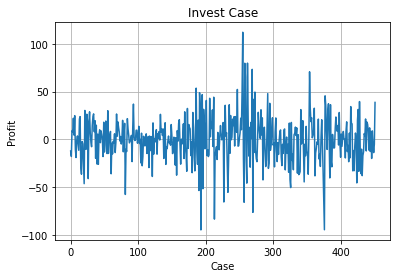

In [150]:
plt.plot(range(len(conf)),conf['Close'] - conf['Open'])
plt.grid()
plt.title('Invest Case')
plt.ylabel('Profit')
plt.xlabel('Case')

# 마치며

- 분류의 경우는 단순히 투자케이스성공에 초점을두어 이익이 보장되는 예측은 아니라고 생각된다.
- 옵션요소가 아직도 무수히 있기때문에 (기간, 추가할 피쳐, method ...) 좋은 모델은 나올거라 생각한다.
- 회귀의 경우는 RMSE가 적당히 있어야 손실혹은 이익이 나타난다. 
- ElasticNet 으로 Regression Model을 정할 수 있다.
- 싸이클을 profit의 평균지점혹은 수익율로 모델을 평가하여 찾는 수준으로 올리면 최적을 찾을것으로 기대된다.
- 투자가설과 규칙을 잘정하여 투자를 해야하고 시뮬레이션 투자케이스 검증을 꼭 해봐야 하겠습니다!

- *성투하시길 바랍니다 ^~^*